# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [7]:
import pandas as pd 
import numpy as np
import random 
#1 Create a DataFrame df from this dictionary data which has the index labels
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
print(df)

#2 Select only the rows where visits are 3 or more. Which types of animals are these?

msk = df[df.visits>=3]
print(msk)


#3. Select the rows where visists are 3 and the animal is a cat
msk_2 = df[(df.visits>=3) & (df.animal == 'cat')]
print(msk_2)

#4 Calculate the sum of all visits in df (i.e. the total number of visits). 

print(df.visits.sum())

#5. Calculate the mean age for each different animal in df.

print(df.age.mean())

#6 Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original DataFrame.

df.loc['k'] = ['cat', '30', '5','yes']
print(df)
print(df.drop('k', axis=0))


  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
  animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no
  animal  age  visits priority
b    cat  3.0       3      yes
f    cat  2.0       3       no
19
3.4375
  animal  age visits priority
a    cat  2.5      1      yes
b    cat    3      3      yes
c  snake  0.5      2       no
d    dog  NaN      3      yes
e    dog    5      2       no
f    cat    2      3       no
g  snake  4.5      1       no
h    cat  NaN      1      yes
i    dog    7      2       no
j    dog    3      1       no
k    cat   30      5      yes
  animal  age visits priority
a    cat  2.5      1      yes
b    cat    

# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [8]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

sorted = df['A'].unique()
print(sorted)

[1 2 3 4 5 6 7]


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [9]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df
sums = df.select_dtypes(pd.np.number).sum().rename('total')
df = df.append(sums)
df
print(df.loc['total'].idxmax())


a


# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [10]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df


#find duplicate rows 
duplicateDFRow = df[df.duplicated()]
print(duplicateDFRow)
#There is no duplicate row in this DataFrame 

Empty DataFrame
Columns: [a, b, c, d, e, f, g, h, i, j]
Index: []


# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [11]:
import pandas as pd 
import numpy as np 
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})


#df_1 = df.nlargest(3, ['vals'])

(df.groupby('grps')['vals']
    .nlargest(3)
    .groupby('grps')
    .sum()

)


grps
a    409
b    156
c    345
Name: vals, dtype: int64

# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [22]:
df_123 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df = df_123.interpolate(method='linear')
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [39]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, 10055.0, 10065, 10075.0, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df_1 = df['From_To'].str.split('_', 1, expand=True)

#print(df_1)
df['From'] = df_1[0].str.capitalize()
df['To'] = df_1[1].str.capitalize()
del df['From_To']
print(df)

   FlightNumber  RecentDelays              Airline      From         To
0       10045.0      [23, 47]               KLM(!)    London      Paris
1       10055.0            []    <Air France> (12)    Madrid      Milan
2       10065.0  [24, 43, 87]  (British Airways. )    London  Stockholm
3       10075.0          [13]       12. Air France  Budapest      Paris
4       10085.0      [67, 32]          "Swiss Air"  Brussels     London


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [37]:
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df['Airline'] = df['Airline'].str.replace('[^\w\s]', '')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM,London,Paris
1,10055.0,[],Air France 12,Madrid,Milan
2,10065.0,"[24, 43, 87]",British Airways,London,Stockholm
3,10075.0,[13],12 Air France,Budapest,Paris
4,10085.0,"[67, 32]",Swiss Air,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [281]:
df = pd.read_csv('data/country_total.csv')
df

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9
...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7
20792,uk,trend,2010.07,2422000,7.7
20793,uk,trend,2010.08,2429000,7.7
20794,uk,trend,2010.09,2447000,7.8


In [296]:
from datetime import datetime
import pandas as pd 
df = pd.read_csv('data/country_total.csv', parse_dates=['month'])

timestamp = '1993-01-01'
dt = datetime.strptime(timestamp, '%Y-%m-%d')

df['year'] = pd.DatetimeIndex(df['month']).year
df['month'] = pd.DatetimeIndex(df['month']).month
df = df[['country', 'seasonality', 'unemployment', 'unemployment_rate', 'year', 'month']]
df


,country,seasonality,unemployment,unemployment_rate,year,month
0,at,nsa,171000,4.5,1993,1
1,at,nsa,175000,4.6,1993,2
2,at,nsa,166000,4.4,1993,3
3,at,nsa,157000,4.1,1993,4
4,at,nsa,147000,3.9,1993,5
...,...,...,...,...,...,...
20791,uk,trend,2429000,7.7,2010,6
20792,uk,trend,2422000,7.7,2010,7
20793,uk,trend,2429000,7.7,2010,8
20794,uk,trend,2447000,7.8,2010,9


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [310]:
df = pd.read_csv('data/country_sex_age.csv')
df

,country,seasonality,sex,age_group,month,unemployment,unemployment_rate
0,at,nsa,f,y25-74,1993.01,61000,4.5
1,at,nsa,f,y25-74,1993.02,62000,4.5
2,at,nsa,f,y25-74,1993.03,62000,4.5
3,at,nsa,f,y25-74,1993.04,63000,4.6
4,at,nsa,f,y25-74,1993.05,63000,4.6
...,...,...,...,...,...,...,...
83155,uk,trend,m,y_lt25,2010.06,518000,21.1
83156,uk,trend,m,y_lt25,2010.07,513000,20.8
83157,uk,trend,m,y_lt25,2010.08,509000,20.5
83158,uk,trend,m,y_lt25,2010.09,513000,20.7


In [334]:
df = pd.read_csv('data/country_sex_age.csv')

gender = (
    df.groupby(['sex', 'seasonality'], as_index=False)['unemployment_rate'].mean()
    )
print(gender)
age_group = (
    df.groupby(['age_group', 'seasonality'], as_index=False)['unemployment_rate'].mean()
)
print(age_group)

both = (
    df.groupby(['sex', 'age_group', 'seasonality'], as_index=False)['unemployment', 'unemployment_rate'].mean()
)
print(both)

  sex seasonality  unemployment_rate
0   f         nsa          13.179216
1   f          sa          12.908743
2   f       trend          12.862163
3   m         nsa          11.708432
4   m          sa          11.662290
5   m       trend          11.643015
  age_group seasonality  unemployment_rate
0    y25-74         nsa           6.870746
1    y25-74          sa           6.918446
2    y25-74       trend           6.926319
3    y_lt25         nsa          18.016902
4    y_lt25          sa          17.690707
5    y_lt25       trend          17.617224
   sex age_group seasonality   unemployment  unemployment_rate
0    f    y25-74         nsa  244200.087758           7.539839
1    f    y25-74          sa  275348.154482           7.579982
2    f    y25-74       trend  270308.535179           7.579934
3    f    y_lt25         nsa  111623.665350          18.818593
4    f    y_lt25          sa  114021.946701          18.323837
5    f    y_lt25       trend  112878.171857          18.231025

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [336]:
both['total_pop'] = (both['unemployment'] / both['unemployment_rate']) * 100
both

,sex,age_group,seasonality,unemployment,unemployment_rate,total_pop
0,f,y25-74,nsa,244200.087758,7.539839,3.238797e+06
1,f,y25-74,sa,275348.154482,7.579982,3.632570e+06
2,f,y25-74,trend,270308.535179,7.579934,3.566107e+06
3,f,y_lt25,nsa,111623.665350,18.818593,5.931563e+05
4,f,y_lt25,sa,114021.946701,18.323837,6.222602e+05
5,f,y_lt25,trend,112878.171857,18.231025,6.191543e+05
6,m,y25-74,nsa,267525.815416,6.201653,4.313782e+06
7,m,y25-74,sa,302136.810603,6.256909,4.828851e+06
8,m,y25-74,trend,298051.182238,6.272703,4.751559e+06
9,m,y_lt25,nsa,121616.937253,17.215211,7.064505e+05


# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [41]:
df = pd.read_csv('data/tennis.csv')
df


,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True
1177,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,4.0,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0,True


In [42]:

#1
print(df.win.value_counts())
true_count = df.win.sum()
print(true_count)
#2 
false_count = len(df) - df.win.sum()
print(false_count)

ratio = true_count / false_count
print(ratio)

#3 top 5 opponents

top_5 = df[df.win==False].groupby('opponent').win.count().sort_values(ascending=False).head(5).index.tolist()
print(top_5)


True     972
False    207
Name: win, dtype: int64
972
207
4.695652173913044
['Rafael Nadal (ESP)', 'Novak Djokovic (SRB)', 'Andy Murray (GBR)', 'Lleyton Hewitt (AUS)', 'David Nalbandian (ARG)']


# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

The best year for money: 2010
1998 was is best year in term of wins:
Federer is getting better and better with year! The graphic can also show us that between 2006 and 2010 he wasn't improving.


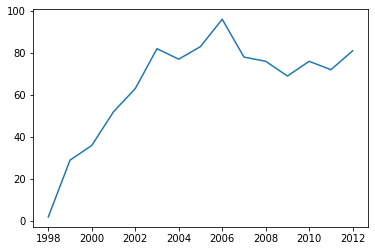

In [60]:
import matplotlib.pyplot as plt 
#1 
fed_win = df.loc[(df['player1 name'] == 'Roger Federer') & (df.win == 1) | (df['player2 name'] == 'Roger Federer') & (df.win == 0)]
cash_money = fed_win.loc[(fed_win['tournament round'] == 'F')]

cash_money['tournament prize money'].str.replace('[ $ , [ < > ( ) ! A . " ]', '').astype(int)

cash_money.groupby(cash_money.year).sum()

print('The best year for money:',cash_money.loc[cash_money['tournament prize money'] == max(cash_money['tournament prize money']), 'year'].iloc[0])

#2 
fed_win['count_me'] = 1

fed_win.groupby(fed_win.year).sum()

print(fed_win.loc[fed_win['count_me'] == max(fed_win['count_me']), 'year'].iloc[0], 'was is best year in term of wins:')

annual = fed_win.groupby(fed_win.year).sum()
annual.sort_values(by='count_me')

plt.plot(annual['count_me'])

print("Federer is getting better and better with year! The graphic can also show us that between 2006 and 2010 he wasn't improving.")
plt.show()

# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [59]:
tournament_win = fed_win.loc[(fed_win['tournament round'] == 'F')]
money = tournament_win['tournament prize money'].str.replace('[ $ , [ < > ( ) ! A . " ]', '').astype(int).sum()
print('Roger Federer made', money,'$$')

Roger Federer made 44934964 $$
